<a href="https://colab.research.google.com/github/mannmoshe/machine-learning/blob/main/FinalProject/ConstructionPlans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Construction plans<br>*By Moshe Mann*

**Overview**<br>
The Israel Planning Administration (IPA) is handling detailed construction plans.<BR>Every detailed plan contains a lot of data, among the rest, division of main and service area.<BR><BR>Main area is the area that divided among the tenants, like the departments,<BR> and the service area is common to all tenants, like parking, stairwell etc.<BR><BR>
In the near future the plans will not include the division between main and service area, because it is not important for the IPA as planning unit, but still, it is important data for regulation.<BR><BR> The purpose of the project is to predict the main and service areas based on the cell and plan features, so that the model can be used for regulatory purposes.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData.csv')

In [3]:
data.shape

(13709, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13709 entries, 0 to 13708
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PL_NUMBER                13709 non-null  object 
 1   LANDUSE                  13709 non-null  object 
 2   MAIN_AREA                13709 non-null  float64
 3   SERVICE_AREA             13709 non-null  float64
 4   CELL_SIZE_TOTAL          13709 non-null  float64
 5   CELL_SIZE_MIN            13709 non-null  float64
 6   CELL_SIZE_MAX            13709 non-null  float64
 7   HOUSING_UNITS            13709 non-null  float64
 8   BUILDING_HEIGHT          13709 non-null  float64
 9   FLOORS_NUM               13709 non-null  float64
 10  TOTAL_AREA               13709 non-null  float64
 11  AUTHORITY                13709 non-null  object 
 12  DISTRICT                 13709 non-null  object 
 13  SECTOR_GROUP             13709 non-null  object 
 14  CONFIRMATION_YEAR     

# Add description of each column.

In [5]:
data.head()

,PL_NUMBER,LANDUSE,MAIN_AREA,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP
0,610-0197038,מגורים,975.0,300.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,מחוזית,דרום,חברה כללית / מעורבת,2017,חדשה
1,610-0197038,מגורים,975.0,300.0,2025.0,0.0,0.0,16.0,11.0,2.0,1275.0,מחוזית,דרום,חברה כללית / מעורבת,2017,חדשה
2,151-0392894,מגורים,960.0,180.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,מחוזית,ירושלים,חברה כללית / מעורבת,2017,התחדשות
3,151-0392894,מגורים,4800.0,960.0,15410.0,0.0,0.0,30.0,17.0,4.0,5760.0,מחוזית,ירושלים,חברה כללית / מעורבת,2017,התחדשות
4,151-0392894,מגורים,640.0,120.0,1600.0,0.0,0.0,4.0,17.0,4.0,760.0,מחוזית,ירושלים,חברה כללית / מעורבת,2017,התחדשות


In [6]:
data['PL_NUMBER'].str.contains('תמל').sum()

5147

In [7]:
data['IS_TAMAL'] = data['PL_NUMBER'].apply(lambda x: 1 if 'תמל' in x else 0)
data['IS_TAMAL'].value_counts()

0    8562
1    5147
Name: IS_TAMAL, dtype: int64

In [8]:
data['LANDUSE'].value_counts()

מגורים                                13344
מגורים ומסחר                            154
מגורים מסחר ותעסוקה                      81
מגורים מסחר ותיירות                      74
מגורים ותיירות                           19
מגורים ומבנים ומוסדות ציבור              10
מגורים מסחר ומבנים ומוסדות ציבור          6
מגורים תעסוקה ותיירות                     6
מגורים ודיור מיוחד                        3
מגורים מסחר ותחבורה                       2
תתתת מגורים ב                             2
מגורים ותעסוקה                            2
מגורים ומשרדים                            2
מגורים ואירוח כפרי                        1
מגורים תיירות ומבנים ומוסדות ציבור        1
מגורים ותחבורה                            1
מגורים תעסוקה ומבנים ומוסדות ציבור        1
Name: LANDUSE, dtype: int64

In [9]:
data['LANDUSE'] = data['LANDUSE'].mask(data['LANDUSE'] != 'מגורים', 'מגורים משולב')

In [10]:
data['LANDUSE'].value_counts()

מגורים          13344
מגורים משולב      365
Name: LANDUSE, dtype: int64

Now let's explore the Main & Service columns.

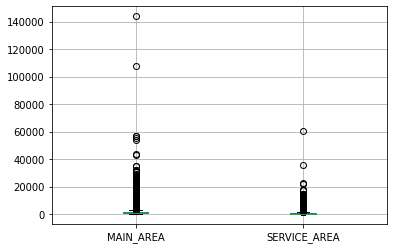

In [11]:
data[["MAIN_AREA","SERVICE_AREA"]].boxplot()

The outliers are probably mistakes. let's see the distribution:

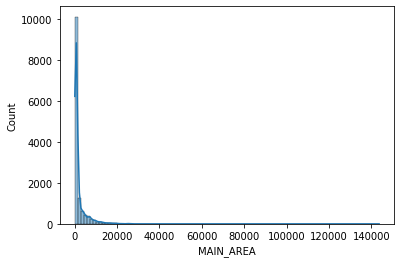

In [12]:
sns.histplot(data=data, x="MAIN_AREA", bins=100, kde=True)

In [13]:
data.iloc[:, 3].describe(percentiles=np.arange(0.05, 1, .05))

count    13709.000000
mean       729.780482
std       1630.404744
min          0.000000
5%          40.000000
10%         50.000000
15%         60.000000
20%         74.000000
25%         90.000000
30%         97.000000
35%        120.000000
40%        140.000000
45%        168.000000
50%        197.000000
55%        220.000000
60%        250.720000
65%        301.520000
70%        396.000000
75%        507.000000
80%        720.000000
85%       1247.200000
90%       2120.000000
95%       3474.400000
max      60530.271000
Name: SERVICE_AREA, dtype: float64

In [14]:
filter_main_area = data['MAIN_AREA'] <= 8580
filtered_data = data.loc[filter_main_area]

Let's explore how many rows we have now, and the main and service data.

In [15]:
print("Remaining rows:", filtered_data.shape[0], filtered_data.shape[0]/data.shape[0])

Remaining rows: 13024 0.9500328251513604


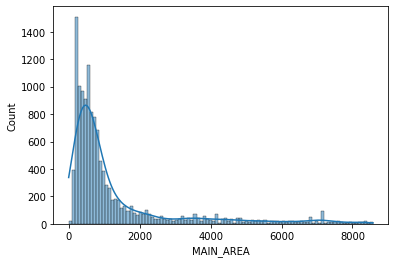

In [16]:
sns.histplot(data=filtered_data, x="MAIN_AREA", bins=100, kde=True)

Let's do the same for the Service column.

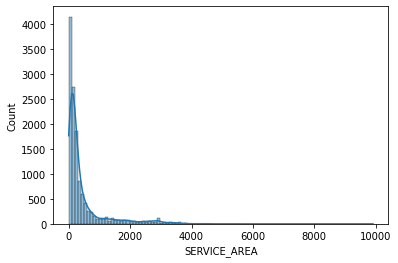

In [17]:
sns.histplot(data=filtered_data, x="SERVICE_AREA", bins=100, kde=True)

In [18]:
filtered_data.iloc[:, 4].describe(percentiles=np.arange(0.05, 1, .05))

count    13024.000000
mean      1042.929850
std       1854.472766
min          0.000000
5%           0.000000
10%          0.000000
15%          0.000000
20%          0.000000
25%        340.000000
30%        400.000000
35%        455.000000
40%        500.000000
45%        537.000000
50%        598.000000
55%        656.000000
60%        726.000000
65%        814.000000
70%        941.739000
75%       1069.000000
80%       1364.400000
85%       1925.650000
90%       2653.640000
95%       3987.550000
max      63924.000000
Name: CELL_SIZE_TOTAL, dtype: float64

In [19]:
filter_service_area = filtered_data['SERVICE_AREA'] <= 2220
filtered_data = filtered_data.loc[filter_service_area]

In [20]:
print("Remaining rows:", filtered_data.shape[0], filtered_data.shape[0]/data.shape[0])

Remaining rows: 12373 0.9025457728499526


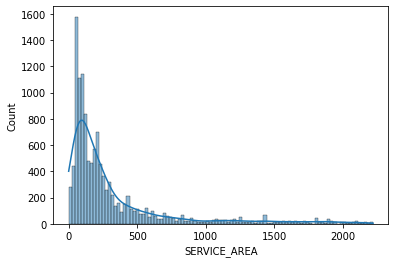

In [21]:
sns.histplot(data=filtered_data, x="SERVICE_AREA", bins=100, kde=True)

Those columns ['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN',
       'CELL_SIZE_MAX'] describe the cell size.

In [22]:
filtered_data[['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX']].describe()

,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX
count,12373.000000,12373.000000,12373.000000
mean,915.024729,204.636008,15.372518
std,1735.648840,687.801227,185.583836
min,0.000000,0.000000,0.000000
25%,329.000000,0.000000,0.000000
50%,575.000000,0.000000,0.000000
75%,998.000000,0.000000,0.000000
max,63924.000000,32000.000000,5575.000000


HOUSING_UNITS shold not be zero.

In [23]:
data['HOUSING_UNITS'].value_counts().sort_index()

0.0        153
1.0       1835
2.0       1504
3.0       1222
4.0       1796
          ... 
471.0        1
524.0       23
564.0        2
613.0        7
1200.0       1
Name: HOUSING_UNITS, Length: 229, dtype: int64

In [24]:
filtered_data['HOUSING_UNITS'] = filtered_data['HOUSING_UNITS'].mask(data['HOUSING_UNITS'] == 0, data['FLOORS_NUM']*2)

In [25]:
filtered_data['HOUSING_UNITS'].value_counts().sort_index()

0.0         6
1.0      1835
2.0      1506
3.0      1222
4.0      1815
         ... 
175.0       2
207.0       1
362.0       5
524.0      23
613.0       7
Name: HOUSING_UNITS, Length: 105, dtype: int64

In [26]:
filtered_data = filtered_data[filtered_data['HOUSING_UNITS'] > 0]
filtered_data.shape 

(12367, 17)

In [27]:
filtered_data['BUILDING_HEIGHT'].value_counts()[:11]

0.0     2359
14.0    1213
15.0     945
9.0      827
12.0     669
8.5      561
17.0     385
10.0     349
8.0      349
30.0     286
11.0     257
Name: BUILDING_HEIGHT, dtype: int64

A lot of missing data, BUILDING_HEIGHT should not be zero.<br>
I will replace it with the mean of BUILDING_HEIGHT with correct values (greather than 0).

In [28]:
building_height_avg = round(filtered_data[filtered_data['BUILDING_HEIGHT'] > 0]['BUILDING_HEIGHT'].mean())
building_height_avg

15

In [29]:
filtered_data['BUILDING_HEIGHT'] = filtered_data['BUILDING_HEIGHT'].mask(filtered_data['BUILDING_HEIGHT']==0, building_height_avg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
filtered_data['BUILDING_HEIGHT'].value_counts()

15.00    3304
14.00    1213
9.00      827
12.00     669
8.50      561
         ... 
16.62       1
7.10        1
25.64       1
12.93       1
23.10       1
Name: BUILDING_HEIGHT, Length: 467, dtype: int64

In [35]:
filtered_data['SECTOR_GROUP'].value_counts()

חברה ערבית             6910
חברה כללית / מעורבת    4845
חברה חרדית              321
(חסר)                   291
Name: SECTOR_GROUP, dtype: int64

In [37]:
filtered_data['SECTOR_GROUP'] = filtered_data['SECTOR_GROUP'].mask(filtered_data['SECTOR_GROUP'] == '(חסר)', 'חברה כללית / מעורבת')
filtered_data['SECTOR_GROUP'].value_counts()

חברה ערבית             6910
חברה כללית / מעורבת    5136
חברה חרדית              321
Name: SECTOR_GROUP, dtype: int64

In [31]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12367 entries, 0 to 13708
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PL_NUMBER                12367 non-null  object 
 1   LANDUSE                  12367 non-null  object 
 2   MAIN_AREA                12367 non-null  float64
 3   SERVICE_AREA             12367 non-null  float64
 4   CELL_SIZE_TOTAL          12367 non-null  float64
 5   CELL_SIZE_MIN            12367 non-null  float64
 6   CELL_SIZE_MAX            12367 non-null  float64
 7   HOUSING_UNITS            12367 non-null  float64
 8   BUILDING_HEIGHT          12367 non-null  float64
 9   FLOORS_NUM               12367 non-null  float64
 10  TOTAL_AREA               12367 non-null  float64
 11  AUTHORITY                12367 non-null  object 
 12  DISTRICT                 12367 non-null  object 
 13  SECTOR_GROUP             12367 non-null  object 
 14  CONFIRMATION_YEAR     

Let's handle null values:

In [32]:
filtered_data.isnull().sum()

PL_NUMBER                  0
LANDUSE                    0
MAIN_AREA                  0
SERVICE_AREA               0
CELL_SIZE_TOTAL            0
CELL_SIZE_MIN              0
CELL_SIZE_MAX              0
HOUSING_UNITS              0
BUILDING_HEIGHT            0
FLOORS_NUM                 0
TOTAL_AREA                 0
AUTHORITY                  0
DISTRICT                   0
SECTOR_GROUP               0
CONFIRMATION_YEAR          0
CONSTRUCTION_TYPE_GROUP    5
IS_TAMAL                   0
dtype: int64

In [33]:
filtered_data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       9409
התחדשות    1590
הסדרה      1363
NaN           5
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas

In [34]:
filtered_data['CONSTRUCTION_TYPE_GROUP'] = filtered_data['CONSTRUCTION_TYPE_GROUP'].fillna(filtered_data['CONSTRUCTION_TYPE_GROUP'].mode().iloc[0])
filtered_data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       9414
התחדשות    1590
הסדרה      1363
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

In [42]:
filtered_data = filtered_data.drop(['PL_NUMBER', 'SERVICE_AREA'], axis=1)

Now let's get dummies of the categorical columns so we will be able to bulid a model.

In [48]:
dummies_data = pd.get_dummies(filtered_data)
print(dummies_data.shape)
dummies_data.columns = ['MAIN_AREA', 'CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX',
       'HOUSING_UNITS', 'BUILDING_HEIGHT', 'FLOORS_NUM', 'TOTAL_AREA',
       'CONFIRMATION_YEAR', 'IS_TAMAL', 'LANDUSE_RESIDENCE',
       'LANDUSE_RESIDENCE_MIXED', 'AUTHORITY_COUNTRY', 'AUTHORITY_DISTRICT',
       'DISTRICT_SOUTH', 'DISTRICT_HAIFA', 'DISTRICT_JERUSALEM', 'DISTRICT_DAN',
       'DISTRICT_NORTH', 'DISTRICT_TEL_AVIV', 'SECTOR_REL',
       'SECTOR_MIXED', 'SECTOR_ARAB',
       'CONSTRUCTION_TYPE_ARRANGING', 'CONSTRUCTION_TYPE_REGENERATION',
       'CONSTRUCTION_TYPE_NEW']
dummies_data.head()

(12367, 26)


,MAIN_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,CONFIRMATION_YEAR,IS_TAMAL,LANDUSE_RESIDENCE,LANDUSE_RESIDENCE_MIXED,AUTHORITY_COUNTRY,AUTHORITY_DISTRICT,DISTRICT_SOUTH,DISTRICT_HAIFA,DISTRICT_JERUSALEM,DISTRICT_DAN,DISTRICT_NORTH,DISTRICT_TEL_AVIV,SECTOR_REL,SECTOR_MIXED,SECTOR_ARAB,CONSTRUCTION_TYPE_ARRANGING,CONSTRUCTION_TYPE_REGENERATION,CONSTRUCTION_TYPE_NEW
0,975.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,2017,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
1,975.0,2025.0,0.0,0.0,16.0,11.0,2.0,1275.0,2017,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,960.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,2017,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,4800.0,15410.0,0.0,0.0,30.0,17.0,4.0,5760.0,2017,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,640.0,1600.0,0.0,0.0,4.0,17.0,4.0,760.0,2017,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [49]:
feature_cols = ['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX',
       'HOUSING_UNITS', 'BUILDING_HEIGHT', 'FLOORS_NUM', 'TOTAL_AREA',
       'CONFIRMATION_YEAR', 'IS_TAMAL', 'LANDUSE_RESIDENCE',
       'LANDUSE_RESIDENCE_MIXED', 'AUTHORITY_COUNTRY', 'AUTHORITY_DISTRICT',
       'DISTRICT_SOUTH', 'DISTRICT_HAIFA', 'DISTRICT_JERUSALEM', 'DISTRICT_DAN',
       'DISTRICT_NORTH', 'DISTRICT_TEL_AVIV', 'SECTOR_REL',
       'SECTOR_MIXED', 'SECTOR_ARAB',
       'CONSTRUCTION_TYPE_ARRANGING', 'CONSTRUCTION_TYPE_REGENERATION',
       'CONSTRUCTION_TYPE_NEW']
X = dummies_data[feature_cols]
y = dummies_data['MAIN_AREA']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [58]:
y_pred = neigh.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("mse:", mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("rmse:", rmse)

mse: 39558.70872077022
rmse: 198.89371211974054


In [63]:
print(y_test)

2647     1760.00
10121    1457.00
9306     4180.00
856       660.00
9430     1970.00
          ...   
12859     401.74
1517      500.00
7319      610.00
4897      750.20
7104      717.60
Name: MAIN_AREA, Length: 4082, dtype: float64


https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe

In [66]:
result_df = pd.DataFrame(y_test)
result_df.head()

,MAIN_AREA
2647,1760.0
10121,1457.0
9306,4180.0
856,660.0
9430,1970.0


In [67]:
result_df['y_pred'] = y_pred

In [68]:
result_df.T

,2647,10121,9306,856,9430,7546,9223,5722,1444,9488,7450,8252,10619,2091,9781,477,3519,9296,4796,9407,1811,3673,9486,1762,9819,7887,11912,9116,9068,335,8062,11302,527,2315,11719,5730,13663,2492,2446,12817,...,10447,10481,1505,6416,2743,10955,4082,4521,4063,13579,8882,2548,740,4707,4645,5729,12293,6892,13357,9420,13622,5709,3149,7466,9878,877,4077,13451,4286,2317,8776,12196,13136,3574,12918,12859,1517,7319,4897,7104
MAIN_AREA,1760.0,1457.0,4180.0,660.0,1970.000,915.40,473.0,200.0,300.0,200.0,1800.0,620.0,320.0,5773.000,2044.0,634.0,878.080,200.0,540.65,1856.0,380.0,624.960,200.0,1020.1020,897.0000,270.0,4320.0,450.0,523.0,5594.0,805.0,2015.710,578.00,1000.0,280.0,1072.000,375.0,450.000,408.80,3750.0,...,570.0,570.000,2200.00,273.0,288.0,301.0,220.0,713.000,220.0,512.0,1147.000,2420.000,240.0,1000.00,550.2,503.0,480.000,400.0,440.000,1991.0,200.000,1230.00,1038.000,1800.0,1472.00,990.0,220.0,841.000,500.0,920.000,891.000,700.00,145.000,1011.360,882.0,401.74,500.000,610.000,750.200,717.600
y_pred,1715.3,1481.4,4206.8,702.5,2044.799,863.09,469.2,199.0,307.0,200.0,1800.0,629.5,320.0,6020.141,1963.2,637.9,900.524,207.1,548.75,1869.6,380.0,642.892,200.0,1020.3468,919.2734,267.0,4172.0,454.1,527.6,5562.5,805.0,2202.549,589.62,953.0,304.3,1015.025,300.0,418.056,389.08,3579.4,...,570.0,512.945,2152.31,271.7,317.6,256.4,220.0,585.116,220.0,600.0,1242.032,2296.808,240.0,907.35,481.8,486.4,427.385,400.0,467.786,2264.5,191.808,1489.43,803.296,1800.0,1620.84,999.4,220.0,794.478,561.9,760.416,1048.522,595.03,158.166,998.496,755.1,324.70,560.675,726.805,678.803,765.342
